# Electrical Fault detection and Classification using ANN models

In [1]:
# Importing necessary packages
import pandas as pd
import numpy as np
import sklearn 
from sklearn import linear_model
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score,f1_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier

In [2]:
#Importing the data
detection_train = pd.read_excel('detect_dataset.xlsx').dropna(axis=1)
class_train = pd.read_csv('classData.csv').dropna(axis=1)

features=['Ia','Ib','Ic','Va','Vb','Vc']
class_target = ['G','C','B','A']

In [3]:
#Defining the inputs and outputs
detection_data_X = detection_train[features]
class_data_X = class_train[features]
detection_data_Y = detection_train['Output (S)']
class_data_Y = class_train[class_target]

#Defining accuracy and error vectors
detect_accuracy = list()
detect_error = list()
class_accuracy = list()
class_error = list()

In [4]:
#Splitting the data 
class_train_X,class_test_X,class_train_Y,class_test_Y= train_test_split(class_data_X,class_data_Y,test_size=0.33,random_state=1)
detection_train_X,detection_test_X,detection_train_Y,detection_test_Y = train_test_split(detection_data_X,detection_data_Y,test_size=0.33,random_state=1)

# Linear regression

In [5]:
#Defining different Models for different classification problems
detection_model = linear_model.Lasso(alpha = 2.0)
class_model = LinearRegression()

In [6]:
#Fitting the data in different models
detection_model.fit(detection_train_X,detection_train_Y)
class_Y = np.array([class_train_Y['G']*1+class_train_Y['A']*2+class_train_Y['B']*3+class_train_Y['C']*5])
class_Y= class_Y.transpose().ravel()
class_model.fit(class_train_X,class_Y)

LinearRegression()

### Results

In [7]:
#Predicting test values and printing out Mean Squared Error
detection_preds = detection_model.predict(detection_test_X)
print('The Error of our Detection Model is: ',mean_squared_error(detection_test_Y,detection_preds))

class_Y = np.array([class_test_Y['G']*1+class_test_Y['A']*2+class_test_Y['B']*3+class_test_Y['C']*5])
class_Y= class_Y.transpose().ravel()
class_preds = class_model.predict(class_test_X)
print('The Error of our Classification Model is: ',mean_squared_error(class_Y,class_preds))

#storing error values
detect_error.append(mean_squared_error(detection_test_Y,detection_preds))
class_error.append(mean_squared_error(class_Y,class_preds))

The Error of our Detection Model is:  0.24375743622444437
The Error of our Classification Model is:  17.301569012924332


In [8]:
# Printing out accuracy scores of our models
print('The accuracy score of our Detection Model is: ',(detection_model.score(detection_test_X,detection_test_Y)))
print('The accuracy score of our Classification Model is: ',(class_model.score(class_test_X,class_Y)))

#Storing accuracy values
detect_accuracy.append((detection_model.score(detection_test_X,detection_test_Y)))
class_accuracy.append((class_model.score(class_test_X,class_Y)))

The accuracy score of our Detection Model is:  0.017945755271112085
The accuracy score of our Classification Model is:  0.03349707443783012


### Graphs

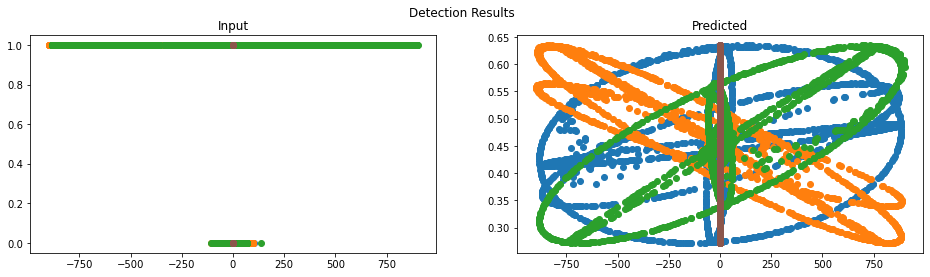

In [9]:
fig, axs = plt.subplots(1,2)
fig.set_figwidth(16)
fig.suptitle('Detection Results')
axs[0].set_title('Input')
axs[1].set_title('Predicted')
axs[0].plot(detection_test_X, detection_test_Y,'o')
axs[1].plot(detection_test_X, detection_preds,'o')

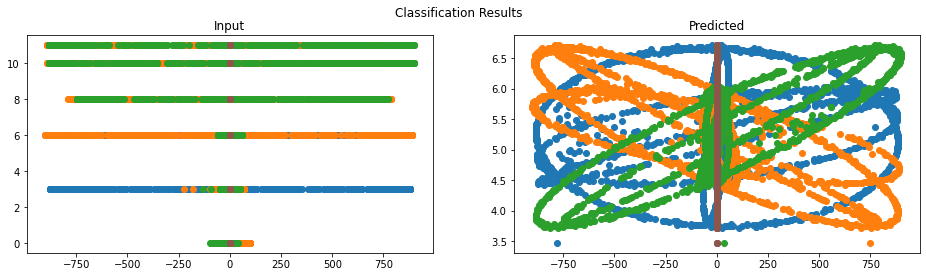

In [10]:
fig, axs = plt.subplots(1,2)
fig.set_figwidth(16)
fig.suptitle('Classification Results')
axs[0].set_title('Input')
axs[1].set_title('Predicted')
axs[0].plot(class_test_X, class_Y,'o')
axs[1].plot(class_test_X, class_preds,'o')

# Logistic regression

In [11]:
#Defining different Models for different classification problems
detection_model = LogisticRegression()
class_model = LogisticRegression()

In [12]:
#Fitting the data in different models
detection_model.fit(detection_train_X,detection_train_Y)
class_Y = np.array([class_train_Y['G']*1+class_train_Y['A']
                    *2+class_train_Y['B']*3+class_train_Y['C']*5])
class_Y= class_Y.transpose().ravel()
class_model.fit(class_train_X,class_Y)

c:\users\dell\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Results

In [13]:
#Predicting test values and printing out Mean Squared Error
detection_preds = detection_model.predict(detection_test_X)
print('The Error of our Detection Model is: ',mean_squared_error(detection_test_Y,detection_preds))

class_Y = np.array([class_test_Y['G']*1+class_test_Y['A']*2+class_test_Y['B']*3+class_test_Y['C']*5])
class_Y= class_Y.transpose().ravel()
class_preds = class_model.predict(class_test_X)
print('The Error of our Classification Model is: ',mean_squared_error(class_Y,class_preds))

#storing error values
detect_error.append(mean_squared_error(detection_test_Y,detection_preds))
class_error.append(mean_squared_error(class_Y,class_preds))

The Error of our Detection Model is:  0.26155011360767483
The Error of our Classification Model is:  45.45818882466281


In [14]:
# Printing out accuracy scores of our models
print('The accuracy score of our Detection Model is: ',(detection_model.score(detection_test_X,detection_test_Y)))
print('The accuracy score of our Classification Model is: ',(class_model.score(class_test_X,class_Y)))

#Storing accuracy values
detect_accuracy.append((detection_model.score(detection_test_X,detection_test_Y)))
class_accuracy.append((class_model.score(class_test_X,class_Y)))

The accuracy score of our Detection Model is:  0.7384498863923251
The accuracy score of our Classification Model is:  0.315606936416185


### Graphs

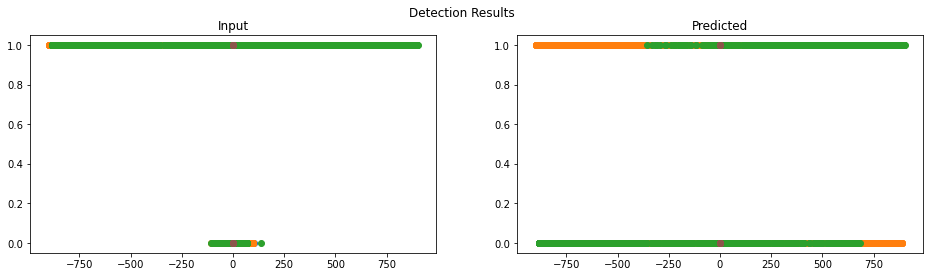

In [15]:
fig, axs = plt.subplots(1,2)
fig.set_figwidth(16)
fig.suptitle('Detection Results')
axs[0].set_title('Input')
axs[1].set_title('Predicted')
axs[0].plot(detection_test_X, detection_test_Y,'o')
axs[1].plot(detection_test_X, detection_preds,'o')

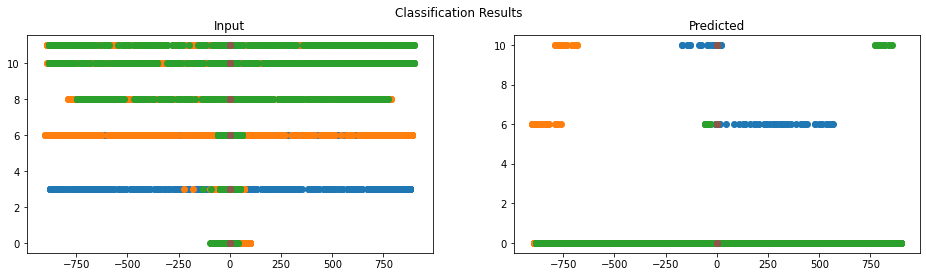

In [16]:
fig, axs = plt.subplots(1,2)
fig.set_figwidth(16)
fig.suptitle('Classification Results')
axs[0].set_title('Input')
axs[1].set_title('Predicted')
axs[0].plot(class_test_X, class_Y,'o')
axs[1].plot(class_test_X, class_preds,'o')

# Polynomial regression

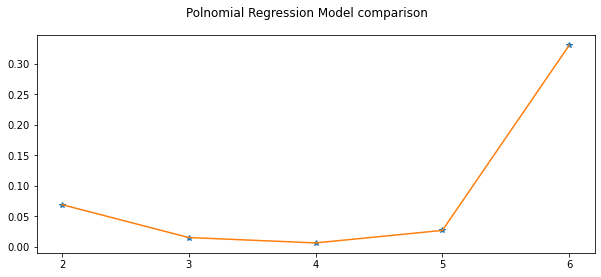

In [17]:
#selecion of suitable polynomial degree
errors = list()
for i in range(2,7):
    class_model = PolynomialFeatures(i)
    class_linear = LinearRegression()
    class_linear.fit(class_model.fit_transform(class_train_X),class_train_Y)
    class_preds = class_linear.predict(class_model.fit_transform(class_test_X))
    errors.append(mean_squared_error(class_test_Y,class_preds))

fig,ax = plt.subplots(1,1)
fig.set_figwidth(10)
fig.suptitle('Polnomial Regression Model comparison')

ax.set_xticks([0,1,2,3,4,5,6,7,8,9,10])
ax.set_xticklabels(['2','3','4','5','6','7','8','9'])
ax.plot(errors,'*')
ax.plot(errors)

In [18]:
#Defining different Models for different classification problems
detection_model = PolynomialFeatures(2)
class_model = PolynomialFeatures(4)
detect_linear = LinearRegression()
class_linear = LinearRegression()

In [19]:
#Fitting the data in different models
detect_linear.fit(detection_model.fit_transform(detection_train_X),detection_train_Y)
class_linear.fit(class_model.fit_transform(class_train_X),class_train_Y)

LinearRegression()

### Results

In [20]:
#Predicting test values and printing out Mean Squared Error
detection_preds = detect_linear.predict(detection_model.fit_transform(detection_test_X))
print('The Error of our Detection Model is: ',mean_squared_error(detection_test_Y,detection_preds))

class_preds = class_linear.predict(class_model.fit_transform(class_test_X))
print('The Error of our Classification Model is: ',mean_squared_error(class_test_Y,class_preds))

#storing error values
detect_error.append(mean_squared_error(detection_test_Y,detection_preds))
class_error.append(mean_squared_error(class_test_Y,class_preds))

The Error of our Detection Model is:  0.03445426707452817
The Error of our Classification Model is:  0.006180073640159064


In [21]:
# Printing out accuracy scores of our models
print('The accuracy score of our Detection Model is: ',(detect_linear.score(detection_model.fit_transform(detection_test_X),detection_test_Y)))
print('The accuracy score of our Classification Model is: ',(class_linear.score(class_model.fit_transform(class_test_X),class_test_Y)))

#Storing accuracy values
detect_accuracy.append((detect_linear.score(detection_model.fit_transform(detection_test_X),detection_test_Y)))
class_accuracy.append((class_linear.score(class_model.fit_transform(class_test_X),class_test_Y)))

The accuracy score of our Detection Model is:  0.8611900430458743
The accuracy score of our Classification Model is:  0.9747653843037387


### Graphs

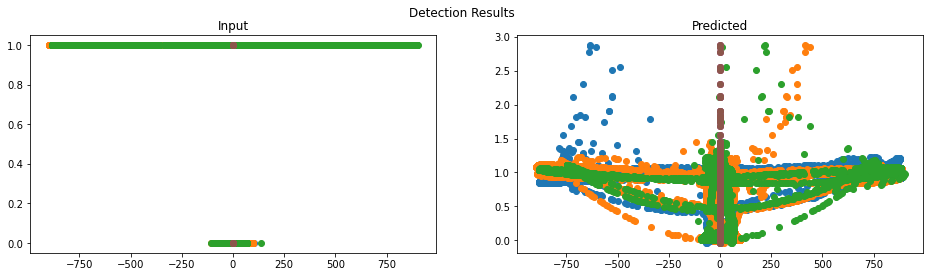

In [22]:
fig, axs = plt.subplots(1,2)
fig.set_figwidth(16)
fig.suptitle('Detection Results')
axs[0].set_title('Input')
axs[1].set_title('Predicted')
axs[0].plot(detection_test_X, detection_test_Y,'o')
axs[1].plot(detection_test_X, detection_preds,'o')

<ipython-input-23-37c20a6370e5>:6: MatplotlibDeprecationWarning: cycling among columns of inputs with non-matching shapes is deprecated.
  axs[0].plot(class_test_X, class_test_Y,'o')
<ipython-input-23-37c20a6370e5>:7: MatplotlibDeprecationWarning: cycling among columns of inputs with non-matching shapes is deprecated.
  axs[1].plot(class_test_X, class_preds,'o')


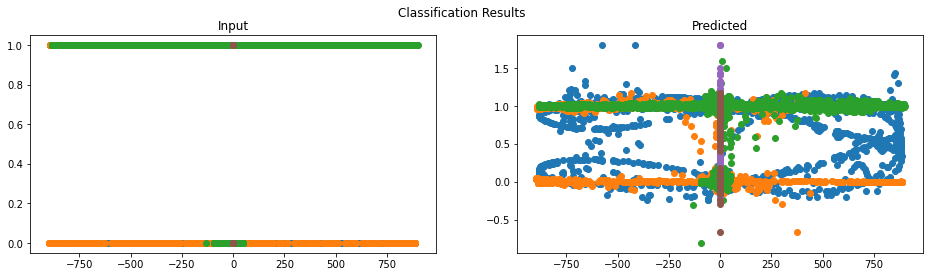

In [23]:
fig, axs = plt.subplots(1,2)
fig.set_figwidth(16)
fig.suptitle('Classification Results')
axs[0].set_title('Input')
axs[1].set_title('Predicted')
axs[0].plot(class_test_X, class_test_Y,'o')
axs[1].plot(class_test_X, class_preds,'o')

# Multi layer perceptron

In [24]:
#Defining different Models for different classification problems
detection_model = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1,max_iter = 1000)
class_model = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(10, 6), random_state=1,max_iter = 2500)

In [25]:
#Fitting the data in different models
detection_model.fit(detection_train_X,detection_train_Y)
class_model.fit(class_train_X,class_train_Y)

c:\users\dell\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(10, 6), max_iter=2500,
              random_state=1, solver='lbfgs')

### Results

In [26]:
#Predicting test values and printing out Mean Squared Error
detection_preds = detection_model.predict(detection_test_X)
print('The Error of our Detection Model is: ',mean_squared_error(detection_test_Y,detection_preds))

class_preds = class_model.predict(class_test_X)
print('The Error of our Classification Model is: ',mean_squared_error(class_test_Y,class_preds))

#storing error values
detect_error.append(mean_squared_error(detection_test_Y,detection_preds))
class_error.append(mean_squared_error(class_test_Y,class_preds))

The Error of our Detection Model is:  0.008331229487503155
The Error of our Classification Model is:  0.05982658959537573


In [27]:
# Printing out accuracy scores of our models
print('The accuracy score of our Detection Model is: ',(detection_model.score(detection_test_X,detection_test_Y)))
print('The accuracy score of our Classification Model is: ',(class_model.score(class_test_X,class_test_Y)))

#Storing accuracy values
detect_accuracy.append((detection_model.score(detection_test_X,detection_test_Y)))
class_accuracy.append((class_model.score(class_test_X,class_test_Y)))

The accuracy score of our Detection Model is:  0.9916687705124968
The accuracy score of our Classification Model is:  0.7857418111753371


### Graphs

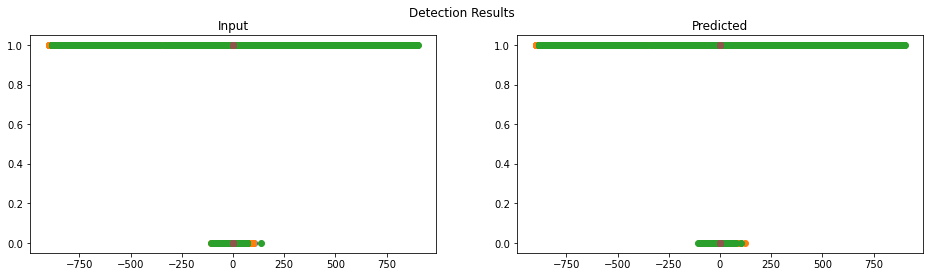

In [28]:
fig, axs = plt.subplots(1,2)
fig.set_figwidth(16)
fig.suptitle('Detection Results')
axs[0].set_title('Input')
axs[1].set_title('Predicted')
axs[0].plot(detection_test_X, detection_test_Y,'o')
axs[1].plot(detection_test_X, detection_preds,'o')

<ipython-input-29-37c20a6370e5>:6: MatplotlibDeprecationWarning: cycling among columns of inputs with non-matching shapes is deprecated.
  axs[0].plot(class_test_X, class_test_Y,'o')
<ipython-input-29-37c20a6370e5>:7: MatplotlibDeprecationWarning: cycling among columns of inputs with non-matching shapes is deprecated.
  axs[1].plot(class_test_X, class_preds,'o')


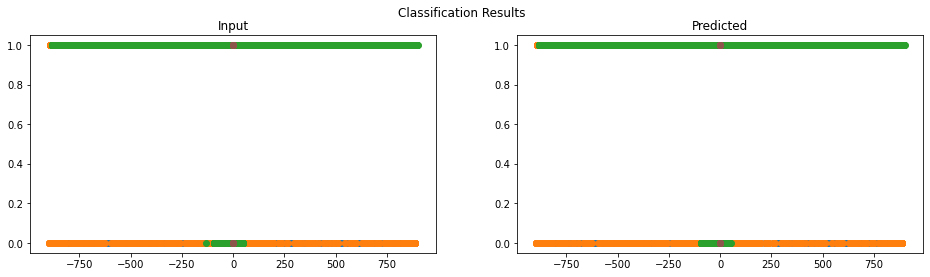

In [29]:
fig, axs = plt.subplots(1,2)
fig.set_figwidth(16)
fig.suptitle('Classification Results')
axs[0].set_title('Input')
axs[1].set_title('Predicted')
axs[0].plot(class_test_X, class_test_Y,'o')
axs[1].plot(class_test_X, class_preds,'o')

# Naive Bayes

In [30]:
#Defining different Models for different classification problems
detection_model = GaussianNB()
class_model = GaussianNB()

In [31]:
#Fitting the data in different models
detection_model.fit(detection_train_X,detection_train_Y)
class_Y = np.array([class_train_Y['G']*1+class_train_Y['A']
                    *2+class_train_Y['B']*3+class_train_Y['C']*5])
class_Y= class_Y.transpose().ravel()
class_model.fit(class_train_X,class_Y)

GaussianNB()

### Results

In [32]:
#Predicting test values and printing out Mean Squared Error
detection_preds = detection_model.predict(detection_test_X)
print('The Error of our Detection Model is: ',mean_squared_error(detection_test_Y,detection_preds))

class_Y = np.array([class_test_Y['G']*1+class_test_Y['A']*2+class_test_Y['B']*3+class_test_Y['C']*5])
class_Y= class_Y.transpose().ravel()
class_preds = class_model.predict(class_test_X)
print('The Error of our Classification Model is: ',mean_squared_error(class_Y,class_preds))

#storing error values
detect_error.append(mean_squared_error(detection_test_Y,detection_preds))
class_error.append(mean_squared_error(class_Y,class_preds))

The Error of our Detection Model is:  0.019439535470840697
The Error of our Classification Model is:  2.1078998073217727


In [33]:
# Printing out accuracy scores of our models
print('The accuracy score of our Detection Model is: ',(detection_model.score(detection_test_X,detection_test_Y)))
print('The accuracy score of our Classification Model is: ',(class_model.score(class_test_X,class_Y)))

#Storing accuracy values
detect_accuracy.append((detection_model.score(detection_test_X,detection_test_Y)))
class_accuracy.append((class_model.score(class_test_X,class_Y)))

The accuracy score of our Detection Model is:  0.9805604645291593
The accuracy score of our Classification Model is:  0.796917148362235


### Graphs

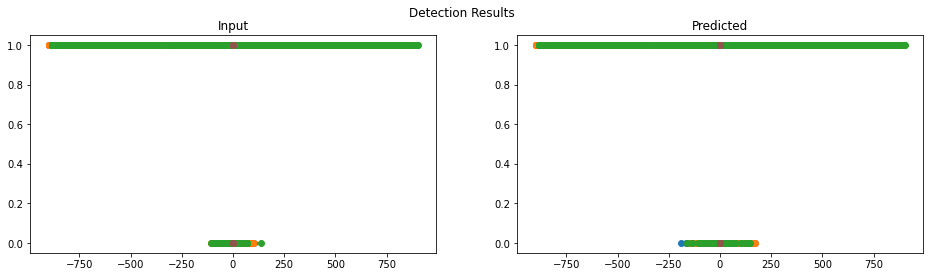

In [34]:
fig, axs = plt.subplots(1,2)
fig.set_figwidth(16)
fig.suptitle('Detection Results')
axs[0].set_title('Input')
axs[1].set_title('Predicted')
axs[0].plot(detection_test_X, detection_test_Y,'o')
axs[1].plot(detection_test_X, detection_preds,'o')

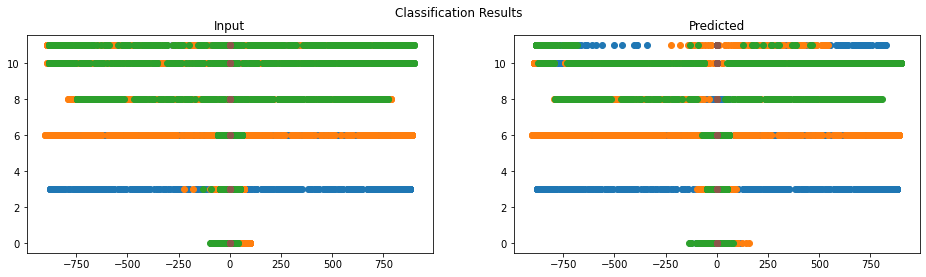

In [35]:
fig, axs = plt.subplots(1,2)
fig.set_figwidth(16)
fig.suptitle('Classification Results')
axs[0].set_title('Input')
axs[1].set_title('Predicted')
axs[0].plot(class_test_X, class_Y,'o')
axs[1].plot(class_test_X, class_preds,'o')

# Decision Tree classifier

In [36]:
#Defining different Models for different classification problems
detection_model = DecisionTreeClassifier()
class_model = DecisionTreeClassifier()

In [37]:
#Fitting the data in different models
detection_model.fit(detection_train_X,detection_train_Y)
class_Y = np.array([class_train_Y['G']*1+class_train_Y['A']
                    *2+class_train_Y['B']*3+class_train_Y['C']*5])
class_Y= class_Y.transpose().ravel()
class_model.fit(class_train_X,class_Y)

DecisionTreeClassifier()

### Results

In [38]:
#Predicting test values and printing out Mean Squared Error
detection_preds = detection_model.predict(detection_test_X)
print('The Error of our Detection Model is: ',mean_squared_error(detection_test_Y,detection_preds))

class_Y = np.array([class_test_Y['G']*1+class_test_Y['A']*2+class_test_Y['B']*3+class_test_Y['C']*5])
class_Y = class_Y.transpose().ravel()
class_preds = class_model.predict(class_test_X)
print('The Error of our Classification Model is: ',mean_squared_error(class_Y,class_preds))

#storing error values
detect_error.append(mean_squared_error(detection_test_Y,detection_preds))
class_error.append(mean_squared_error(class_Y,class_preds))

The Error of our Detection Model is:  0.005806614491290078
The Error of our Classification Model is:  0.33641618497109826


In [39]:
# Printing out accuracy scores of our models
print('The accuracy score of our Detection Model is: ',(detection_model.score(detection_test_X,detection_test_Y)))
print('The accuracy score of our Classification Model is: ',(class_model.score(class_test_X,class_Y)))

#Storing accuracy values
detect_accuracy.append((detection_model.score(detection_test_X,detection_test_Y)))
class_accuracy.append((class_model.score(class_test_X,class_Y)))

The accuracy score of our Detection Model is:  0.99419338550871
The accuracy score of our Classification Model is:  0.8682080924855491


### Graphs

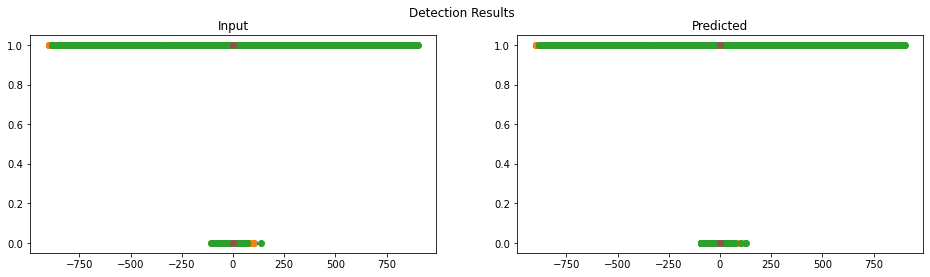

In [40]:
fig, axs = plt.subplots(1,2)
fig.set_figwidth(16)
fig.suptitle('Detection Results')
axs[0].set_title('Input')
axs[1].set_title('Predicted')
axs[0].plot(detection_test_X, detection_test_Y,'o')
axs[1].plot(detection_test_X, detection_preds,'o')

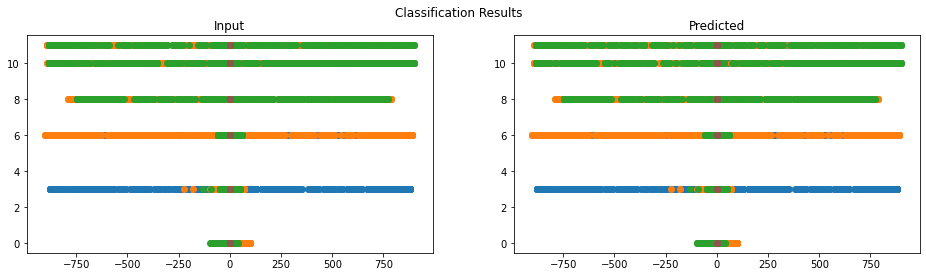

In [41]:
fig, axs = plt.subplots(1,2)
fig.set_figwidth(16)
fig.suptitle('Classification Results')
axs[0].set_title('Input')
axs[1].set_title('Predicted')
axs[0].plot(class_test_X, class_Y,'o')
axs[1].plot(class_test_X, class_preds,'o')

# SVM

In [42]:
#Defining different Models for different classification problems
detection_model = SVC()
class_model = LinearSVC()

In [43]:
#Fitting the data in different models
detection_model.fit(detection_train_X,detection_train_Y)
class_Y = np.array([class_train_Y['G']*1+class_train_Y['A']
                    *2+class_train_Y['B']*3+class_train_Y['C']*5])
class_Y= class_Y.transpose().ravel()
class_model.fit(class_train_X,class_Y)

c:\users\dell\appdata\local\programs\python\python38\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC()

### Results

In [44]:
#Predicting test values and printing out Mean Squared Error
detection_preds = detection_model.predict(detection_test_X)
print('The Error of our Detection Model is: ',mean_squared_error(detection_test_Y,detection_preds))

class_Y = np.array([class_test_Y['G']*1+class_test_Y['A']*2+class_test_Y['B']*3+class_test_Y['C']*5])
class_Y = class_Y.transpose().ravel()
class_preds = class_model.predict(class_test_X)
print('The Error of our Classification Model is: ',mean_squared_error(class_Y,class_preds))

#storing error values
detect_error.append(mean_squared_error(detection_test_Y,detection_preds))
class_error.append(mean_squared_error(class_Y,class_preds))

The Error of our Detection Model is:  0.01792476647311285
The Error of our Classification Model is:  35.773795761079


In [45]:
# Printing out accuracy scores of our models
print('The accuracy score of our Detection Model is: ',(detection_model.score(detection_test_X,detection_test_Y)))
print('The accuracy score of our Classification Model is: ',(class_model.score(class_test_X,class_Y)))

#Storing accuracy values
detect_accuracy.append((detection_model.score(detection_test_X,detection_test_Y)))
class_accuracy.append((class_model.score(class_test_X,class_Y)))

The accuracy score of our Detection Model is:  0.9820752335268872
The accuracy score of our Classification Model is:  0.3375722543352601


### Graphs

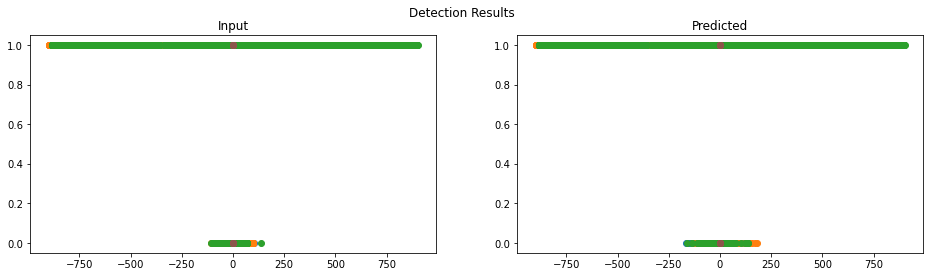

In [46]:
fig, axs = plt.subplots(1,2)
fig.set_figwidth(16)
fig.suptitle('Detection Results')
axs[0].set_title('Input')
axs[1].set_title('Predicted')
axs[0].plot(detection_test_X, detection_test_Y,'o')
axs[1].plot(detection_test_X, detection_preds,'o')

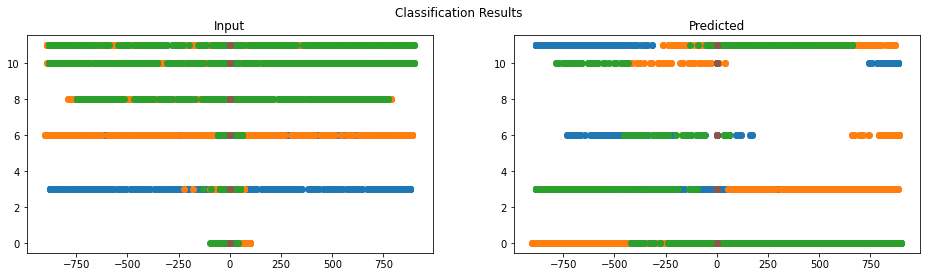

In [47]:
fig, axs = plt.subplots(1,2)
fig.set_figwidth(16)
fig.suptitle('Classification Results')
axs[0].set_title('Input')
axs[1].set_title('Predicted')
axs[0].plot(class_test_X, class_Y,'o')
axs[1].plot(class_test_X, class_preds,'o')

# KNN

In [48]:
#Defining different Models for different classification problems
detection_model = KNeighborsClassifier(n_neighbors=2)
class_model = KNeighborsClassifier(n_neighbors=6)

In [49]:
#Fitting the data in different models
detection_model.fit(detection_train_X,detection_train_Y)
class_Y = np.array([class_train_Y['G']*1+class_train_Y['A']
                    *2+class_train_Y['B']*3+class_train_Y['C']*5])
class_Y= class_Y.transpose().ravel()
class_model.fit(class_train_X,class_Y)

KNeighborsClassifier(n_neighbors=6)

### Results

In [50]:
#Predicting test values and printing out Mean Squared Error
detection_preds = detection_model.predict(detection_test_X)
print('The Error of our Detection Model is: ',mean_squared_error(detection_test_Y,detection_preds))

class_Y = np.array([class_test_Y['G']*1+class_test_Y['A']*2+class_test_Y['B']*3+class_test_Y['C']*5])
class_Y = class_Y.transpose().ravel()
class_preds = class_model.predict(class_test_X)
print('The Error of our Classification Model is: ',mean_squared_error(class_Y,class_preds))

#storing error values
detect_error.append(mean_squared_error(detection_test_Y,detection_preds))
class_error.append(mean_squared_error(class_Y,class_preds))

The Error of our Detection Model is:  0.007573844988639233
The Error of our Classification Model is:  0.9845857418111753


In [51]:
# Printing out accuracy scores of our models
print('The accuracy score of our Detection Model is: ',(detection_model.score(detection_test_X,detection_test_Y)))
print('The accuracy score of our Classification Model is: ',(class_model.score(class_test_X,class_Y)))

#Storing accuracy values
detect_accuracy.append((detection_model.score(detection_test_X,detection_test_Y)))
class_accuracy.append((class_model.score(class_test_X,class_Y)))

The accuracy score of our Detection Model is:  0.9924261550113608
The accuracy score of our Classification Model is:  0.8246628131021194


### Graphs

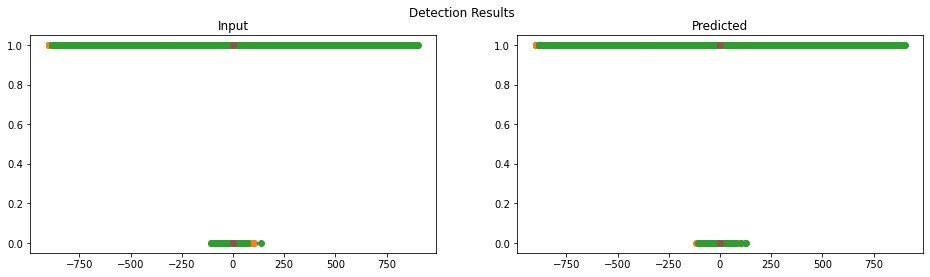

In [52]:
fig, axs = plt.subplots(1,2)
fig.set_figwidth(16)
fig.suptitle('Detection Results')
axs[0].set_title('Input')
axs[1].set_title('Predicted')
axs[0].plot(detection_test_X, detection_test_Y,'o')
axs[1].plot(detection_test_X, detection_preds,'o')

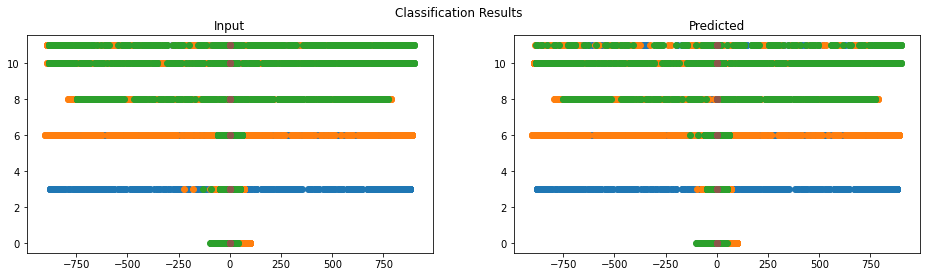

In [53]:
fig, axs = plt.subplots(1,2)
fig.set_figwidth(16)
fig.suptitle('Classification Results')
axs[0].set_title('Input')
axs[1].set_title('Predicted')
axs[0].plot(class_test_X, class_Y,'o')
axs[1].plot(class_test_X, class_preds,'o')

# Model selection

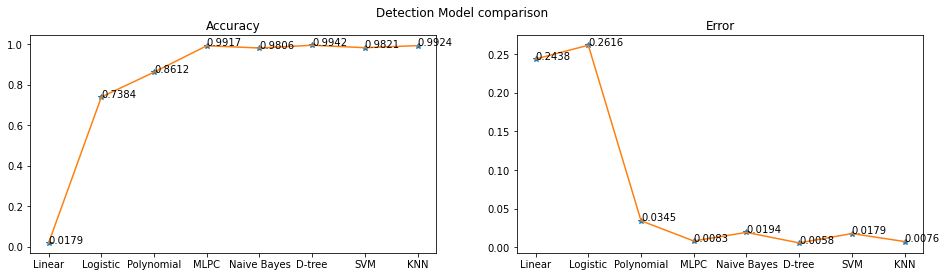

In [54]:
fig,ax = plt.subplots(1,2)
fig.set_figwidth(16)
fig.suptitle('Detection Model comparison')
x = [0,1,2,3,4,5,6,7]

ax[0].set_xticks(x)
ax[0].set_xticklabels(['Linear','Logistic','Polynomial','MLPC','Naive Bayes','D-tree','SVM','KNN'])
ax[0].set_title('Accuracy')
ax[0].plot(detect_accuracy,'*')
ax[0].plot(detect_accuracy)
for i in range(len(detect_accuracy)):
    detect_accuracy[i] = round(detect_accuracy[i],4)
for i,j in zip(x,detect_accuracy):
    ax[0].annotate(str(j),xy=(i,j))

ax[1].set_xticks(x)
ax[1].set_xticklabels(['Linear','Logistic','Polynomial','MLPC','Naive Bayes','D-tree','SVM','KNN'])
ax[1].set_title('Error')
ax[1].plot(detect_error,'*')
ax[1].plot(detect_error)
for i in range(len(detect_error)):
    detect_error[i] = round(detect_error[i],4)
for i,j in zip(x,detect_error):
    ax[1].annotate(str(j),xy=(i,j))

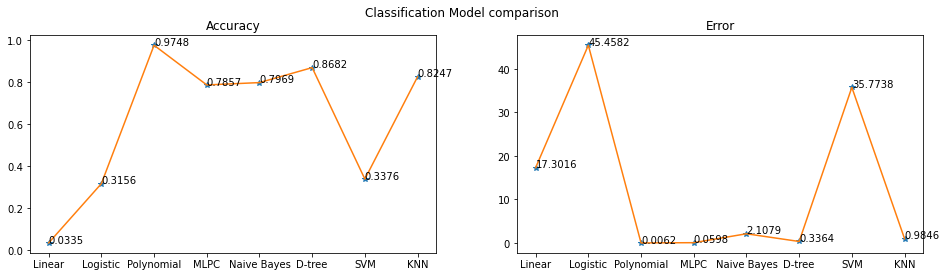

In [55]:
fig,ax = plt.subplots(1,2)
fig.set_figwidth(16)
fig.suptitle('Classification Model comparison')
x = [0,1,2,3,4,5,6,7]

ax[0].set_xticks([0,1,2,3,4,5,6,7])
ax[0].set_xticklabels(['Linear','Logistic','Polynomial','MLPC','Naive Bayes','D-tree','SVM','KNN'])
ax[0].set_title('Accuracy')
ax[0].plot(class_accuracy,'*')
ax[0].plot(class_accuracy)
for i in range(len(class_accuracy)):
    class_accuracy[i] = round(class_accuracy[i],4)
for i,j in zip(x,class_accuracy):
    ax[0].annotate(str(j),xy=(i,j))

ax[1].set_xticks([0,1,2,3,4,5,6,7])
ax[1].set_xticklabels(['Linear','Logistic','Polynomial','MLPC','Naive Bayes','D-tree','SVM','KNN'])
ax[1].set_title('Error')
ax[1].plot(class_error,'*')
ax[1].plot(class_error)
for i in range(len(class_error)):
    class_error[i] = round(class_error[i],4)
for i,j in zip(x,class_error):
    ax[1].annotate(str(j),xy=(i,j))